# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

In [1]:
!rm -rf visualization
!git clone https://github.com/ds4e/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 35 (delta 3), reused 2 (delta 2), pack-reused 30 (from 1)
Receiving objects: 100% (35/35), 7.16 MiB | 11.89 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cancer = pd.read_csv('visualization/data/Breast Cancer METABRIC.csv')
cancer.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [8]:
cancer_filtered = cancer[['Overall Survival (Months)', 'Overall Survival Status']].dropna()
cancer_filtered = cancer_filtered.rename(columns={'Overall Survival (Months)': 'Survival_Months', 'Overall Survival Status': 'Status'})
cancer_filtered['Survival_Months'] = pd.to_numeric(cancer_filtered['Survival_Months'],errors = 'coerce')
cancer_filtered = cancer_filtered.dropna(subset=['Survival_Months'])
cancer_filtered = cancer_filtered[np.isfinite(cancer_filtered['Survival_Months'])]
cancer_filtered['Status'] = cancer_filtered['Status'].astype(str)
cancer_filtered.head()


,Survival_Months,Status
0,140.500000,Living
1,84.633333,Living
2,163.700000,Deceased
3,164.933333,Living
4,41.366667,Deceased


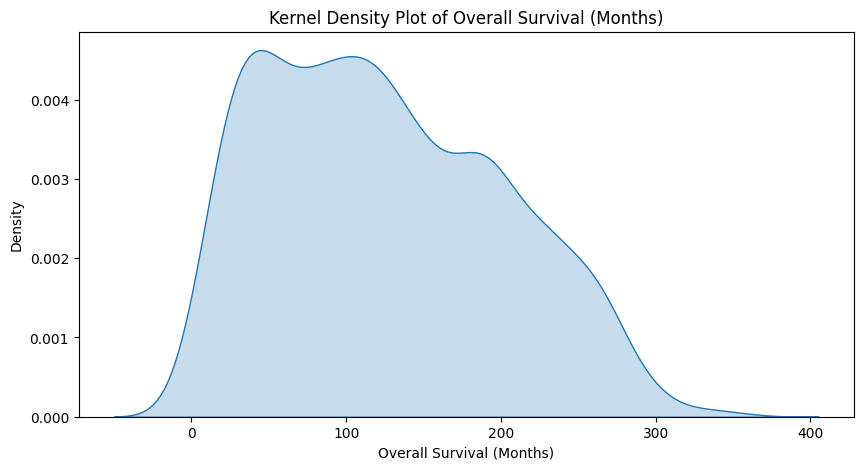

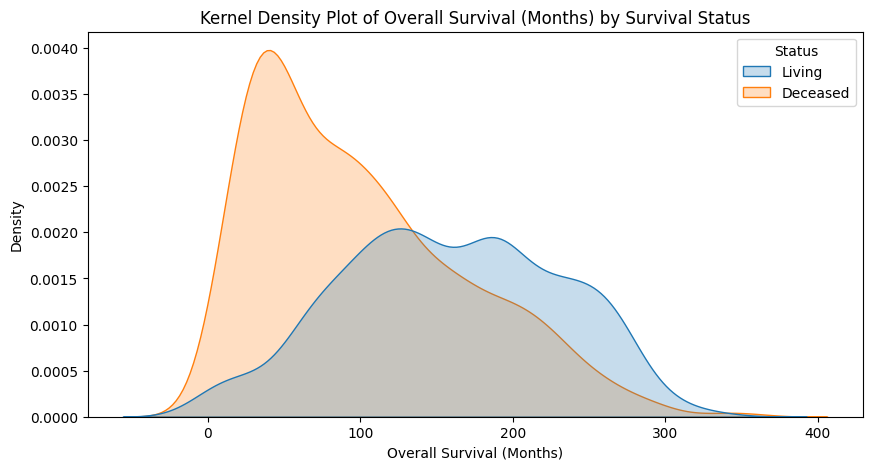

In [9]:
# Plot Kernel Density Estimation (KDE) of Overall Survival (Months)
plt.figure(figsize=(10, 5))
sns.kdeplot(cancer_filtered['Survival_Months'], fill=True)
plt.title('Kernel Density Plot of Overall Survival (Months)')
plt.xlabel('Overall Survival (Months)')
plt.ylabel('Density')
plt.show()

# KDE plots conditioned on survival status
plt.figure(figsize=(10, 5))
sns.kdeplot(data=cancer_filtered, x='Survival_Months', hue='Status', fill=True)
plt.title('Kernel Density Plot of Overall Survival (Months) by Survival Status')
plt.xlabel('Overall Survival (Months)')
plt.ylabel('Density')
plt.show()

2. I created kernel density plots for overall survival months and survival months based on survival status (living or deceased). The overall survival months is slightly skewed right, showing the patients with cancer have a shorterned time to live. The deceased density plot is obviously skewed to the right more than the living, but it is interesting to see how skewed it is. Those diagnosed with cancer do seem to truly have a very short period to live and this can be seen by how dense the graph is close to 0 survival months.

In [10]:
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['Survival_Months'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['Survival_Months']==t)*(df['Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate


times, hazard_rate, cumulative_hazard = hazard(cancer_filtered)


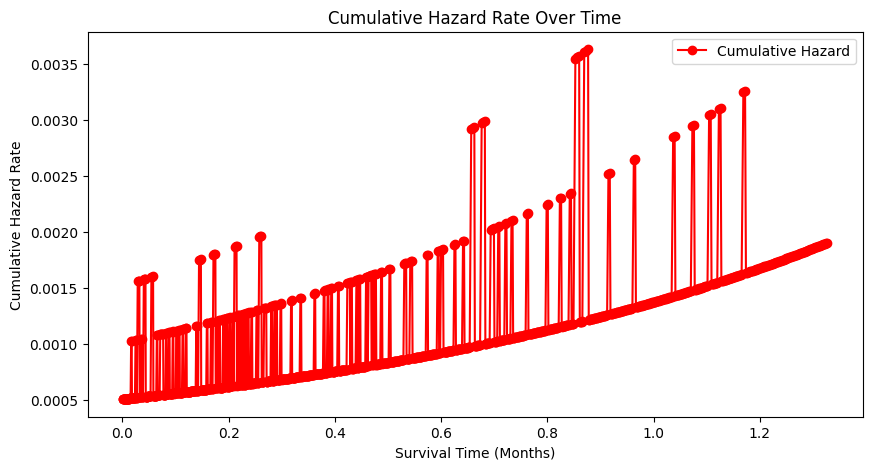

In [11]:
# Plot cumulative hazard rate
plt.figure(figsize=(10, 5))
plt.plot(times, cumulative_hazard, marker='o', linestyle='-', color='r', label="Cumulative Hazard")
plt.title("Cumulative Hazard Rate Over Time")
plt.xlabel("Survival Time (Months)")
plt.ylabel("Cumulative Hazard Rate")
plt.legend()
plt.show()

3. Hazard rates increase over time (as the number of survival months increases). This shows / confirms that the risk of death increases as the time living with cancer increases.

Looking at chemotherapy variable:

In [14]:
chemo = cancer[['Overall Survival (Months)', 'Overall Survival Status','Chemotherapy']].dropna()


In [16]:
chemo = cancer[['Overall Survival (Months)', 'Overall Survival Status','Chemotherapy']].dropna()
chemo = chemo.rename(columns={'Overall Survival (Months)': 'Survival_Months', 'Overall Survival Status': 'Status'})
chemo['Survival_Months'] = pd.to_numeric(chemo['Survival_Months'],errors = 'coerce')
chemo['Chemotherapy'] = chemo['Chemotherapy'].astype(str)
chemo = chemo.dropna(subset=['Survival_Months'])
chemo['Status'] = chemo['Status'].astype(str)
chemo.head()

,Survival_Months,Status,Chemotherapy
0,140.500000,Living,No
1,84.633333,Living,No
2,163.700000,Deceased,Yes
3,164.933333,Living,Yes
4,41.366667,Deceased,Yes


In [19]:
def hazard_by_category(df, category_col):
    """ Compute hazard and cumulative hazard for each category of a categorical variable. """
    hazard_results = {}

    for category in df[category_col].dropna().unique():
        df_subset = df[df[category_col] == category].copy()
        df_subset = df_subset[['Survival_Months', 'Status']].dropna()

        cumulative_hazard, times, hazard_rate = hazard(df_subset)
        hazard_results[category] = (times, hazard_rate, cumulative_hazard)

    return hazard_results


hazard_results = hazard_by_category(chemo, 'Chemotherapy')


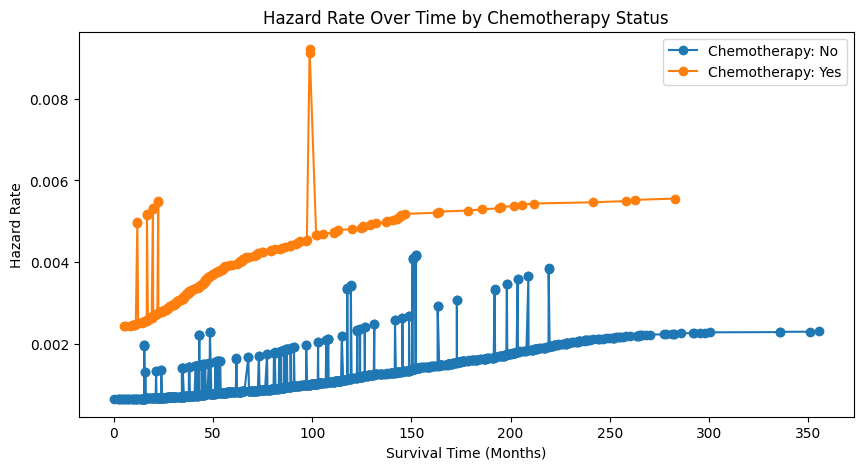

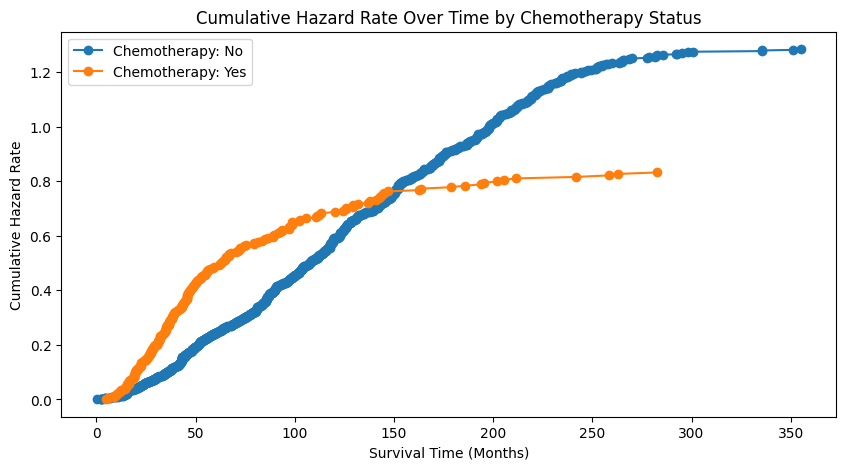

In [20]:
plt.figure(figsize=(10, 5))
for category, (times, hazard_rate, _) in hazard_results.items():
    plt.plot(times, hazard_rate, marker='o', linestyle='-', label=f"Chemotherapy: {category}")

plt.title("Hazard Rate Over Time by Chemotherapy Status")
plt.xlabel("Survival Time (Months)")
plt.ylabel("Hazard Rate")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
for category, (times, _, cumulative_hazard) in hazard_results.items():
    plt.plot(times, cumulative_hazard, marker='o', linestyle='-', label=f"Chemotherapy: {category}")

plt.title("Cumulative Hazard Rate Over Time by Chemotherapy Status")
plt.xlabel("Survival Time (Months)")
plt.ylabel("Cumulative Hazard Rate")
plt.legend()
plt.show()

4. Chemotherapy has more culmulative risk in shorter time periods, but as time increases past 150 months, non-chemotherapy risk is much greater. This shows that chemotherapy may be more of a polarizing option for treatment, as it can improve chance of living in the long term but may have adverse effects in the short term. In the first graph, we see that chemotherapy generally has higher hazard than non-chemotherapy. This is an interesting result and is not what I was expecting, but can make sense due to the high risk, high reward nature of chemotherapy as a treatment option for cancer.

5. Doctors can use hazard curves to identify high-risk patients groups and can help design trial based on risks of particular treatment options or other categorical variables. These hazard curves allow us to compare categories in numerous categorical variables to compare aginst each other and over time to recommned personalized treatment for individual patients and specific groups. Identifying effective treatments due data visualization is increasingly important as we aim to improve survival outcomes for cancer patients, and those struggling with any other diseases or medical conditions.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.